7. Transforming Variables in the Bike Sharing Dataset
   - Task: Apply transformations like log, square root, and Box-Cox transformations to skewed variables in the Bike Sharing dataset.
   - Dataset: Bike Sharing Dataset


In [8]:
import pandas as pd
import numpy as np
from scipy import stats


In [2]:
df = pd.read_csv('bike_sharing.csv')


df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
df=df.drop('dteday',axis=1)

In [7]:
skewed_feats = df.apply(lambda x: x.skew()).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skewed_feats})
print(skewness)

                Skew
holiday     5.638538
casual      2.499237
registered  1.557904
cnt         1.277412
weathersit  1.228047
windspeed   0.574905
instant     0.000000
weekday    -0.002998
season     -0.005416
temp       -0.006021
mnth       -0.009253
yr         -0.010243
hr         -0.010680
atemp      -0.090429
hum        -0.111287
workingday -0.785258


In [9]:
# Apply Log Transformation
df['log_casual'] = np.log(df['casual'] + 1)
df['log_registered'] = np.log(df['registered'] + 1)
df['log_cnt'] = np.log(df['cnt'] + 1)

In [10]:
# Apply Square Root Transformation
df['sqrt_casual'] = np.sqrt(df['casual'])
df['sqrt_registered'] = np.sqrt(df['registered'])
df['sqrt_cnt'] = np.sqrt(df['cnt'])

In [11]:
# Apply Box-Cox Transformation
df['casual_boxcox'], lambda_casual = stats.boxcox(df['casual'] + 1)
df['registered_boxcox'], lambda_registered = stats.boxcox(df['registered'] + 1)
df['cnt_boxcox'], lambda_cnt = stats.boxcox(df['cnt'] + 1)

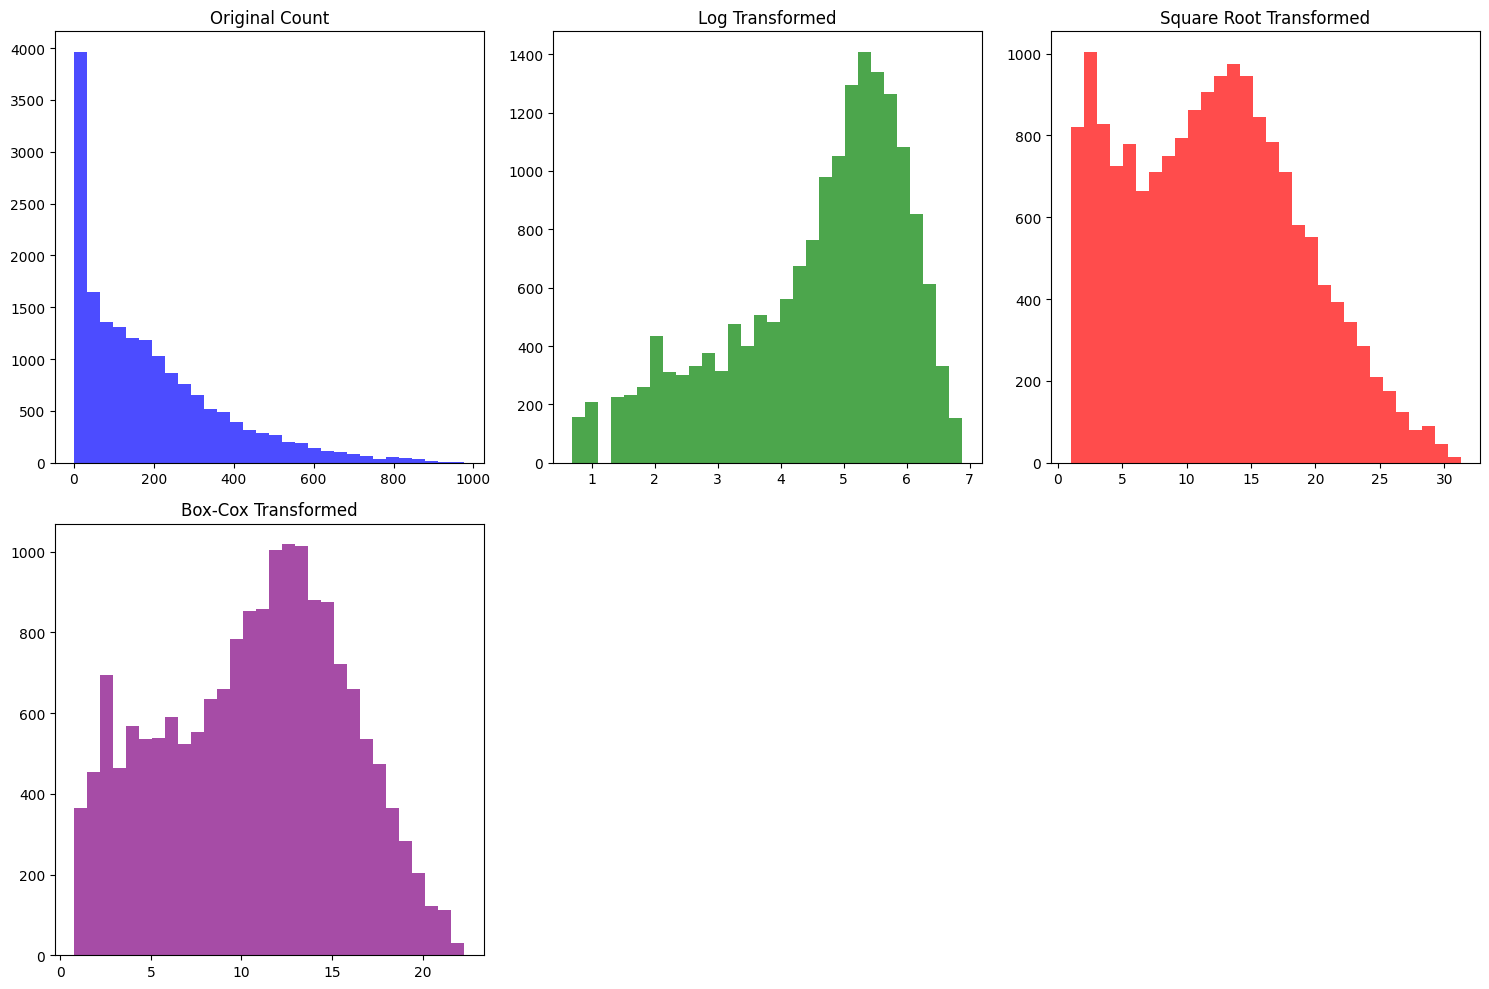

In [12]:
import matplotlib.pyplot as plt

# Plot histograms for 'cnt' variable
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.hist(df['cnt'], bins=30, color='blue', alpha=0.7)
plt.title('Original Count')

plt.subplot(2, 3, 2)
plt.hist(df['log_cnt'], bins=30, color='green', alpha=0.7)
plt.title('Log Transformed')

plt.subplot(2, 3, 3)
plt.hist(df['sqrt_cnt'], bins=30, color='red', alpha=0.7)
plt.title('Square Root Transformed')

plt.subplot(2, 3, 4)
plt.hist(df['cnt_boxcox'], bins=30, color='purple', alpha=0.7)
plt.title('Box-Cox Transformed')

plt.tight_layout()
plt.show()
